In [1]:
import pandas as pd
import yfinance as yf
from matplotlib import pyplot as plt
import numpy as np
import torch

In [2]:
tsla = yf.Ticker('TSLA')
tsla_data = tsla.history(period='5y')
tsla_data.reset_index(inplace=True)
tsla_data.head()

<bound method NDFrame.head of            Date        Open        High         Low       Close     Volume  \
0    2017-11-17   21.711332   21.778000   20.876667   21.003332  206026500   
1    2017-11-20   20.919333   21.033333   20.316668   20.582666  123715500   
2    2017-11-21   20.724001   21.215334   20.580667   21.187332  108919500   
3    2017-11-22   21.118000   21.161333   20.789333   20.840000   73764000   
4    2017-11-24   20.919333   21.094000   20.733334   21.036667   48661500   
...         ...         ...         ...         ...         ...        ...   
1253 2022-11-10  189.899994  191.000000  180.029999  190.720001  132703000   
1254 2022-11-11  186.000000  196.520004  182.589996  195.970001  114229200   
1255 2022-11-14  192.770004  195.729996  186.339996  190.949997   92226600   
1256 2022-11-15  195.880005  200.820007  192.059998  194.419998   91293800   
1257 2022-11-16  191.509995  192.570007  185.660004  186.919998   65991502   

      Dividends  Stock Splits  
0

Text(0, 0.5, 'Prices ($)')

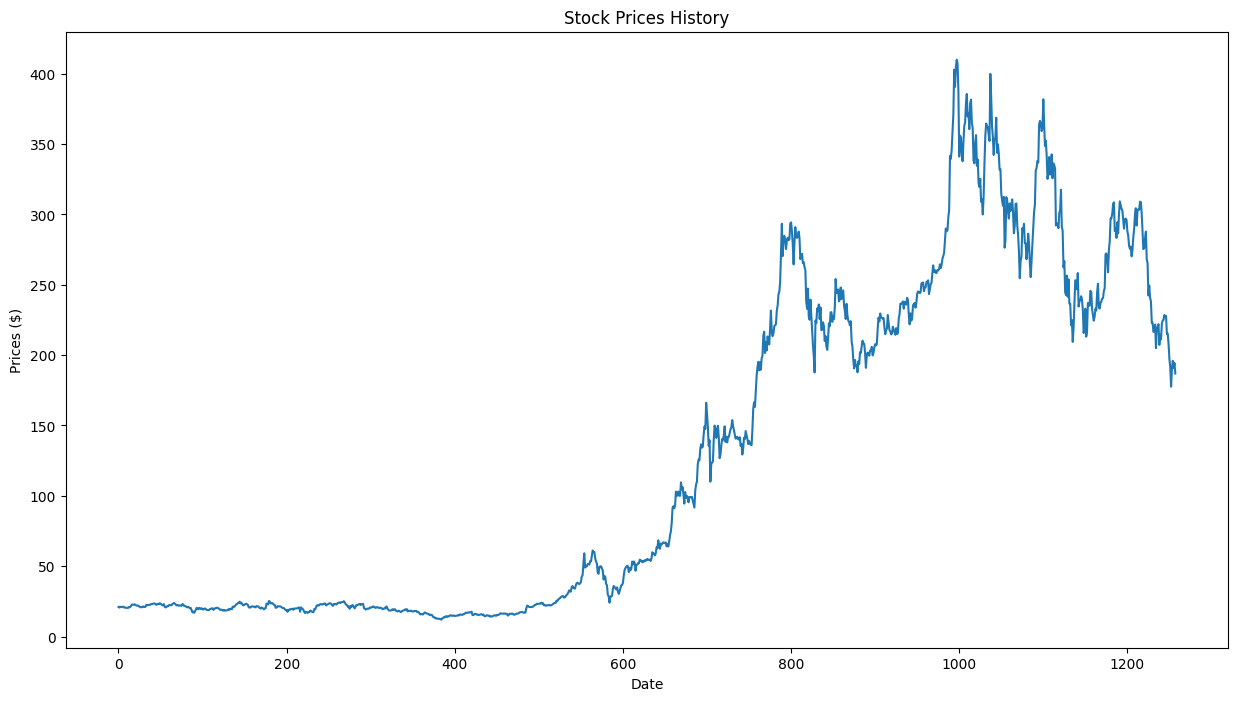

In [3]:
plt.figure(figsize=(15, 8))
plt.title('Stock Prices History')
plt.plot(tsla_data['Close'])
plt.xlabel('Date')
plt.ylabel('Prices ($)')

In [4]:
close_data = tsla_data.iloc[:,4].values.reshape(-1,1)
# volume_data = tsla_data.iloc[:,5].values.reshape(-1,1)
# open_data = tsla_data.iloc[:,1].values.reshape(-1,1)
#extract the Close Price and The volume for that day

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
# scaled_volume = scaler.fit_transform(volume_data)
# scaled_open = scaler.fit_transform(open_data)
scaled_close = scaler.fit_transform(close_data)

In [6]:
scaled_data = []

for i in range(0,len(scaled_close)):
    scaled_data.append(scaled_close[i])

scaled_data = np.array(scaled_data)

In [7]:
scaled_data.shape

(1258, 1)

In [8]:
train_split = .7
train_data = scaled_data[0:int(train_split*len(scaled_data))]
train_data_len = len(train_data)


In [9]:
input_vector_length = 50

x_train = []
y_train = []

for i in range(input_vector_length,len(train_data)):
    x_train.append(train_data[i-input_vector_length:i])
    y_train.append(train_data[i]) ## add the 0 here to chop off the volume, only want the volume as input

x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
x_train.shape

(830, 50, 1)

In [11]:
test_data = scaled_data[int(train_split*len(scaled_data)) - input_vector_length:]
test_data_len = len(test_data)
x_test = []
y_test = test_data[input_vector_length:]

for i in range(input_vector_length,len(test_data)):
    x_test.append(test_data[i-input_vector_length:i])

x_test = np.array(x_test)

In [12]:
# make training and test sets in torch
x_train = torch.from_numpy(x_train).type(torch.Tensor)
x_test = torch.from_numpy(x_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [13]:
y_train.size(),x_train.size()

(torch.Size([830, 1]), torch.Size([830, 50, 1]))

In [14]:
len(x_train)

830

In [15]:
from LSTM import Nueral_Network

model = Nueral_Network(1, 32)
loss_function = torch.nn.MSELoss()
optimiser = torch.optim.Adam(model.parameters(), lr=.01)

print(model)

Nueral_Network(
  (lstm): fromScratchLSTM()
  (fc): Linear(in_features=32, out_features=1, bias=True)
)


In [16]:
num_epochs = 100
loss_history = np.zeros(num_epochs)

for epoch in range(num_epochs):
    y_train_pred = model(x_train)

    loss=loss_function(y_train_pred, y_train)

    print(f"Epoch {epoch} MSE: {loss.item()}")

    loss_history[epoch] = loss.item()

    # fixes exploding gradients
    optimiser.zero_grad()

    #backpropogate
    loss.backward()

    #update the weights
    optimiser.step()

Epoch 0 MSE: 0.039144597947597504
Epoch 1 MSE: 0.03617921099066734
Epoch 2 MSE: 0.03311162441968918
Epoch 3 MSE: 0.030223626643419266
Epoch 4 MSE: 0.026510071009397507
Epoch 5 MSE: 0.021387306973338127
Epoch 6 MSE: 0.014084706082940102
Epoch 7 MSE: 0.0035182680003345013
Epoch 8 MSE: 0.016923727467656136
Epoch 9 MSE: 0.008088575676083565
Epoch 10 MSE: 0.002394710900261998
Epoch 11 MSE: 0.0027550130616873503
Epoch 12 MSE: 0.005997182801365852
Epoch 13 MSE: 0.007423685863614082
Epoch 14 MSE: 0.006712554022669792
Epoch 15 MSE: 0.005483684595674276
Epoch 16 MSE: 0.0046389480121433735
Epoch 17 MSE: 0.0040382519364356995
Epoch 18 MSE: 0.003116326406598091
Epoch 19 MSE: 0.0016927073011174798
Epoch 20 MSE: 0.0004984124680049717
Epoch 21 MSE: 0.0007167414296418428
Epoch 22 MSE: 0.002024601446464658
Epoch 23 MSE: 0.0023336021695286036
Epoch 24 MSE: 0.0016782596940174699
Epoch 25 MSE: 0.0013612402835860848
Epoch 26 MSE: 0.0012128420639783144
Epoch 27 MSE: 0.000811577367130667
Epoch 28 MSE: 0.00044

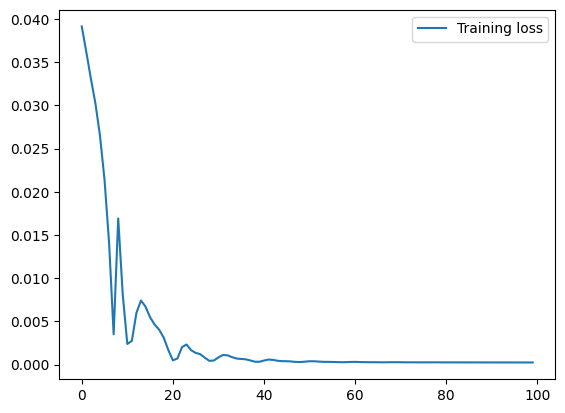

In [17]:
plt.plot(loss_history, label="Training loss")
plt.legend()
plt.show()

In [18]:
test_predictions = model(x_test).detach().numpy()
y_train_pred = y_train_pred.detach().numpy()
y_test = y_test.detach().numpy()
y_train = y_train.detach().numpy()
test_predictions = scaler.inverse_transform(test_predictions)
train_predictions = scaler.inverse_transform(y_train_pred)
test_rmse = np.sqrt(np.mean(test_predictions - y_test)**2)
train_rmse = np.sqrt(np.mean(train_predictions - y_train)**2)

print(f'Train error: {train_rmse} RMSE')
print(f'Test error: {test_rmse} RMSE')

Train error: 68.17008209228516 RMSE
Test error: 265.80792236328125 RMSE


C:\Users\dksil\AppData\Local\Temp\ipykernel_16468\519884937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = test_predictions


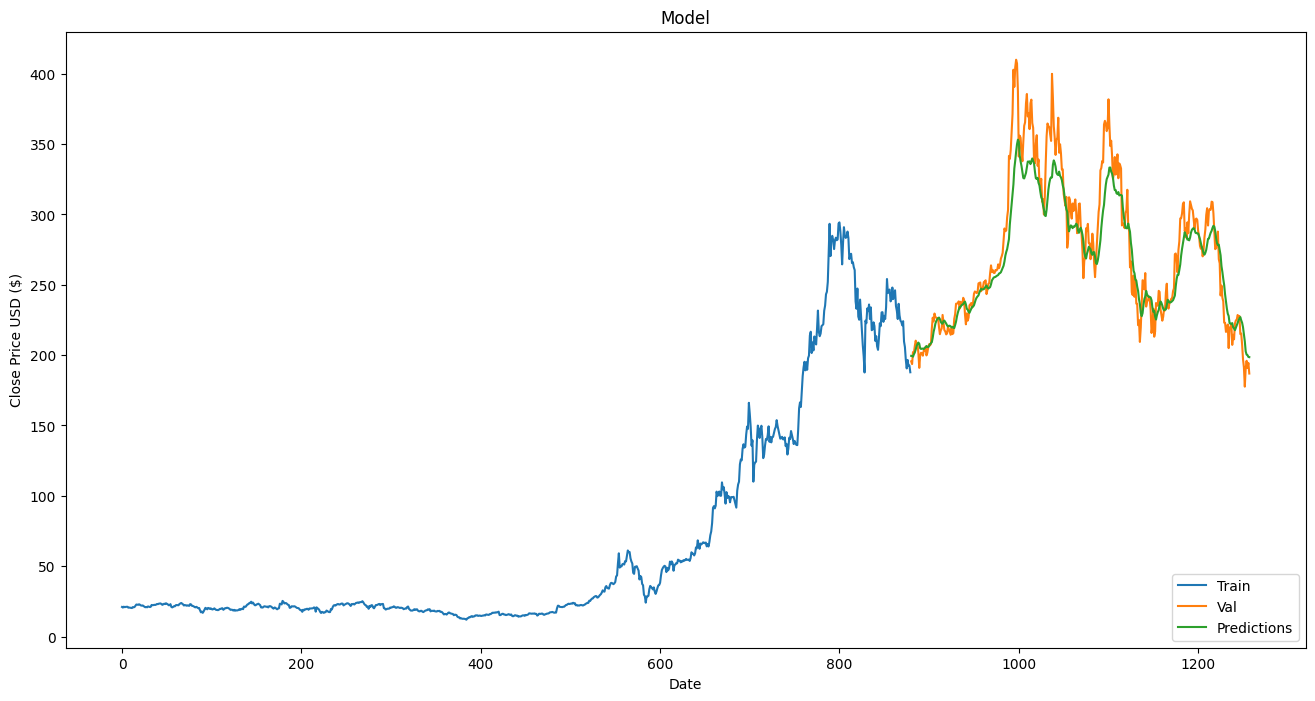

In [19]:
data = tsla_data.filter(['Close'])
train = data[:train_data_len]
validation = data[train_data_len:]
validation['Predictions'] = test_predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

C:\Users\dksil\AppData\Local\Temp\ipykernel_16468\3238405931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = test_predictions


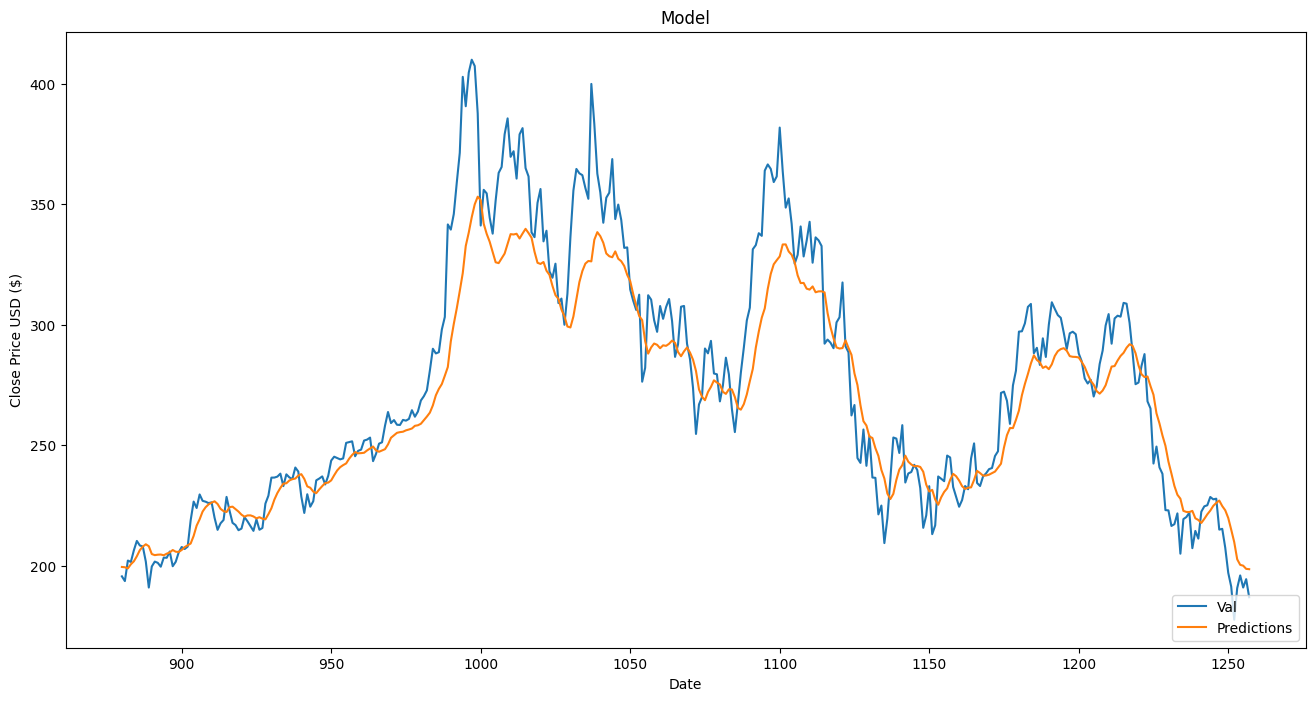

In [20]:
data = tsla_data.filter(['Close'])
validation = data[train_data_len:]
validation['Predictions'] = test_predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()